In [1]:
from E2_AnalysisHelpers import *

# define current year, round, and track
thisYr = 2021
thisRnd = 18
thisTrk = getFiles(csvSesDir, f"{thisYr}-MotoGP-Round_{thisRnd}-*.csv")[0].replace(csvSesDir, "").split("-")[3]

print(thisYr)
print(thisRnd)
print(thisTrk)

2021
18
Valencia


In [2]:
# Imports and definitions
import numpy as np
from IPython.display import clear_output
%matplotlib inline
import matplotlib as mpl
from scipy.stats import linregress
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# import sklearn
# import sklearn.linear_model
# from sklearn.model_selection import train_test_split as setSplit

rnds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13",
        "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]
yrs = ["2021","2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013",
       "2012", "2011", "2010", "2009" , "2008", "2007", "2006"]

# calculate year ranges and get active track
loYr = thisYr - 5
yrRng = range(loYr, thisYr + 1)

print("done")

done


In [3]:
pracFiles = getFiles(csvSesDir, f"{thisYr}-MotoGP-Round_{thisRnd}-*-FP*.csv")
frames = []

# create dataframe for each file in pracFiles
for file in pracFiles:
    df = pd.read_csv(file)
    frames.append(df)

df = pd.concat(frames)

bCols = ["lap_val", "pit", "one_val", "two_val", "thr_val", "four_val", "avg_spd"]
for col in bCols:
    df = df[df[col] != "FALSE"]
    df = df[df[col].notna()]

print("done")

done


In [4]:
rdrs = df.rdr_num.unique()
practices = ["FP1", "FP2", "FP3", "FP4"]
lets = ["st", "nd", "rd", "th"]
positions = range(0, 51)
pointsPro = [25, 20, 16, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# rdrNums = []
# rdrTimes = []
# rdrImpr = []
# rdrPoints = []
rdrDicts = []

for rdr in rdrs:
    tempFrame = df.loc[df["rdr_num"] == rdr]
    f_name = tempFrame["f_name"].iloc[0]
    l_name = tempFrame["l_name"].iloc[0]
        
    rndPoints = 0
    times = []
    pLis = []        
        
    for prac in practices:
        rdrFr = df.loc[(df["rdr_num"] == rdr) & (df["session"] == prac)]
        rdrFr = rdrFr.nsmallest(5, "lap_seconds")

        try:
            pos = rdrFr["pos"].iloc[0]
        except:
            pos = "20"
            
        for i in lets:
            pos = pos.replace(i, "")
        pos = int(pos) - 1
        points = pointsPro[pos]
        pLis.append(points)
        rndPoints = rndPoints + points
        
        avgTime = rdrFr["lap_seconds"].mean()
        times.append(avgTime)
    
    rdrDict = {"rdr_num": rdr, "f_name": f_name, "l_name": l_name,
               "FP1_avg_time": times[0], "FP1_points": pLis[0],
               "FP2_avg_time": times[1], "FP2_points": pLis[1],
               "FP3_avg_time": times[2], "FP3_points": pLis[2],
               "FP4_avg_time": times[3], "FP4_points": pLis[3],
               "improve": (pLis[3] - pLis[0]), "avg_points": (rndPoints / 4),
               "best_rider": ((rndPoints / 4) + (pLis[3] - pLis[0]))}
    rdrDicts.append(rdrDict)

finFr = pd.DataFrame(rdrDicts)
rdrId = df[["rdr_num", "manu", "f_name", "l_name", "nat"]]
rdrId = rdrId.drop_duplicates()
print("done")

done


In [5]:
mostImproved = finFr.sort_values(by = ["improve"], ascending = False).head(3)
mostImproved = mostImproved[["rdr_num", "f_name", "l_name", "improve"]]

mostSteady = finFr.sort_values(by = ["avg_points"], ascending = False).head(3)
mostSteady = mostSteady[["rdr_num", "f_name", "l_name", "avg_points"]]

combined = finFr.sort_values(by = ["best_rider"], ascending = False).head(3)
combined = combined[["rdr_num", "f_name", "l_name", "best_rider"]]

bestFour = finFr.sort_values(by = ["best_rider"], ascending = False).head(3)
bestFour = bestFour[["rdr_num", "f_name", "l_name", "FP4_points"]]


In [6]:
mostImproved

,rdr_num,f_name,l_name,improve
9,30,takaaki,nakagami,19
14,20,fabio,quartararo,19
10,42,alex,rins,11


In [7]:
mostSteady

,rdr_num,f_name,l_name,avg_points
1,43,jack,miller,16.5
5,63,francesco,bagnaia,13.0
9,30,takaaki,nakagami,12.5


In [8]:
combined

,rdr_num,f_name,l_name,best_rider
9,30,takaaki,nakagami,31.50
14,20,fabio,quartararo,27.25
10,42,alex,rins,20.75


In [9]:
bestFour

,rdr_num,f_name,l_name,FP4_points
9,30,takaaki,nakagami,25
14,20,fabio,quartararo,20
10,42,alex,rins,16


In [10]:
frames = []

rdrId

for yr in yrRng:
    dif = thisYr - 1 - yr
    mul = (8 - dif)
    files = getFiles(csvFinalDir, f"{yr}-Moto*{thisTrk}-Result.csv")
    for file in files:
        df = pd.read_csv(file)
        
        startLen = len(df)
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RAC"]
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RACE"]
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RAC1"]
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RACE1"]
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RAC2"]
        if len(df["session"].unique()) > 1:
            df = df[df.session != "RACE2"]
        endLen = len(df)
        if startLen > 0:
            if endLen == 0:
                print("Problem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\nProblem\n")
                exit()
        
        df = df[["yr", "rnd", "lge", "trk", "f_name", "l_name", "nat", "pos"]]
        df = df.dropna()
        
        conDict = {"pos": int }
        df = df.astype(conDict)
        df["idex"] = df["pos"] - 1
        df = df.drop_duplicates()
        df["points"] = [pointsPro[x] for x in df.idex]
        
        df["points"] = (df["points"] * mul) / 8
        
        if "Moto2" in file:
            df["points"] = df["points"] - 3
        if "Moto3" in file:
            df["points"] = df["points"] - 5
        
        ndf = pd.merge(rdrId, df, how = "left",
                        left_on = ["f_name", "l_name", "nat"],
                        right_on = ["f_name", "l_name", "nat"])
        
        ndf = ndf.dropna()
        frames.append(ndf)

df = pd.concat(frames)
conDict = {"pos": int, "yr": int, "rnd": int}
df = df.astype(conDict)
df = df[["yr", "rnd", "lge", "rdr_num", "f_name", "l_name", "nat", "pos", "points"]]

print("done")    


done


In [11]:
recDF = df[df.yr > thisYr - 1]
if len(recDF) == 0:
    recDF = df[df.yr > thisYr - 2]
    
col = recDF["rnd"]
maxVal = col.max()
recDF = recDF[recDF.rnd == maxVal]
recDF.sort_values(by = ["pos"])

recDF = recDF[recDF.pos < 4]
recDF = recDF[["lge", "f_name", "l_name", "nat"]]
recDF = recDF.drop_duplicates()

ndf = pd.merge(recDF, df, how = "left",
                left_on = ["f_name", "l_name", "nat"],
                right_on = ["f_name", "l_name", "nat"])

conDict = {"yr": str, "rnd": str, "rdr_num": str}
ndf = ndf.astype(conDict)
ndf["race"] = ndf["yr"] + "-" + ndf["rnd"]
ndf.loc[ndf.points < 0, "points"] = 0

ndf["id"] = ndf["f_name"] + " " + ndf["l_name"] + " " + ndf["rdr_num"]
ndf = ndf[["race", "id", "pos", "points"]]

print("done")


done


In [12]:
ids = ndf.sort_values(by = ["race"], ascending=False)
ids = ids["id"].unique()

print("done")

done


Text(0, 0.5, 'Finishing Position')

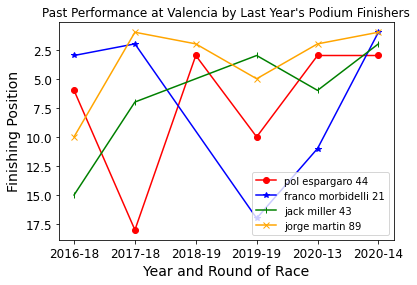

In [13]:
# turns out this analysis isn't very useful
colors = ["red", "blue", "green", "orange", "cyan", "hotpink", "grey", "black", "yellow"]
markers = ["o", "*", "|", "x", ".", "P", "v", "^", ","]

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = 0
for i in ids:
    indf = ndf.loc[ndf["id"] == i]
    date = indf["race"]
    results = indf["pos"]
    plt.plot(date, results, label = i, color = colors[x], marker = markers[x])
    
    x = x + 1
    
plt.gca().invert_yaxis()
plt.legend()
plt.title(f"Past Performance at {thisTrk} by Last Year's Podium Finishers")
plt.xlabel(f"Year and Round of Race")
plt.ylabel("Finishing Position")

In [14]:
conDict = {"yr": str, "rnd": str, "rdr_num": str}
pointsFrame = df.sort_values(by = ["points"], ascending = False)
pointsFrame = pointsFrame.astype(conDict)
pointsFrame["id"] = pointsFrame["f_name"] + " " + pointsFrame["l_name"] + " " + pointsFrame["rdr_num"]
pointsFrame["race"] = pointsFrame["yr"] + "-" + pointsFrame["rnd"]
pointsFrame["event"] = pointsFrame["yr"] + "-" + pointsFrame["rnd"] + "-" + pointsFrame["lge"]

eCount = len(pointsFrame["event"].unique())
pointsFrame = pointsFrame[["race", "id", "pos", "points"]]

pointsFrame

,race,id,pos,points
4,2020-13,joan mir 36,1,25.0
7,2020-14,franco morbidelli 21,1,25.0
11,2020-14,jorge martin 89,1,22.0
1,2020-14,jack miller 43,2,20.0
10,2020-13,alex rins 42,2,20.0
...,...,...,...,...
16,2018-19,brad binder 33,26,-3.0
0,2017-18,iker lecuona 27,18,-3.0
0,2016-18,iker lecuona 27,24,-3.0
14,2016-18,fabio quartararo 20,14,-4.0


In [24]:
pFrame = pointsFrame

frames = []
ids = pFrame["id"].unique()
for rID in ids:
    rdrFrame = pFrame.loc[pFrame["id"] == rID]
    tPoints = rdrFrame["points"].sum()
    avgPoints = tPoints / eCount
    rdrFrame["avg_points"] = avgPoints
    rdrFrame = rdrFrame[["id", "avg_points"]]
    rdrFrame = rdrFrame.drop_duplicates()
    frames.append(rdrFrame)

rdrFrame = pd.concat(frames)
pFrame = pFrame[["race", "id"]].drop_duplicates()
pFrame = pd.merge(pFrame, rdrFrame, how = "left",
            left_on = ["id"],
            right_on = ["id"])

print("done")


done


,id,avg_points
10,alex rins 42,4.550000
11,jorge martin 89,4.283333
4,joan mir 36,3.625000
8,pol espargaro 44,3.616667
17,andrea dovizioso 4,3.375000


Text(0, 0.5, 'Finishing Position')

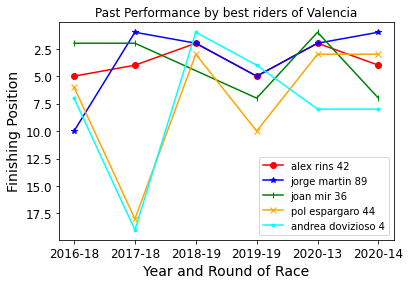

In [23]:
bestFrame = rdrFrame.nlargest(5, "avg_points")
conDict = {"yr": str, "rnd": str, "rdr_num": str}
xf = df.astype(conDict)

xf["id"] = xf["f_name"] + " " + xf["l_name"] + " " + xf["rdr_num"]
xf["race"] = xf["yr"] + "-" + xf["rnd"]
xf = xf.sort_values(by = ["race"])
bestFrame = pd.merge(bestFrame, xf, how = "left",
                left_on = ["id"],
                right_on = ["id"])

colors = ["red", "blue", "green", "orange", "cyan", "hotpink", "grey", "black", "yellow"]
markers = ["o", "*", "|", "x", ".", "P", "v", "^", ","]

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = 0
ids = bestFrame["id"].unique()
for i in ids:
    indf = bestFrame.loc[bestFrame["id"] == i]
    date = indf["race"]
    results = indf["pos"]
    plt.plot(date, results, label = i, color = colors[x], marker = markers[x])
    
    x = x + 1
    
plt.gca().invert_yaxis()
plt.legend()
plt.title(f"Past Performance by best riders of {thisTrk}")
plt.xlabel(f"Year and Round of Race")
plt.ylabel("Finishing Position")